In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot

from matplotlib import pyplot as plt

# data comes from data.gov and United States Census data for Maryland Counties
data = pd.read_csv("Maryland_Counties_Socioeconomic_Characteristics.csv")
traffic = pd.read_csv("Traffic_Violations_2.csv")

In [3]:
# race columns need combining/scrubbing
race = data[["White Alone", "Black Alone", "Asian Alone", "American Indian/Alaska Native Alone", "Native Hawaiian/Pacific Islander Alone", "Some Other Race Alone", "Two or More Races", "Hispanic or Latino (of any race)"]]
race.head()

,White Alone,Black Alone,Asian Alone,American Indian/Alaska Native Alone,Native Hawaiian/Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino (of any race)
0,64164,5899,594,120,24,210,1580,1257
1,417111,91567,20818,1025,408,13095,20576,41275
2,514340,231516,49045,2320,398,8728,22290,42438
3,73885,10797,1504,150,34,541,3913,3276
4,26338,4376,190,96,18,721,1046,2247


In [4]:
# no other gender column here like the traffic data has. There's only 117 data points listed as "other" so maybe not a big deal
gender = data[["Male", "Female"]]
gender.head()

,Male,Female
0,37892,34699
1,279581,285019
2,392930,435707
3,45184,45640
4,15971,16814


<AxesSubplot:xlabel='index', ylabel='population'>

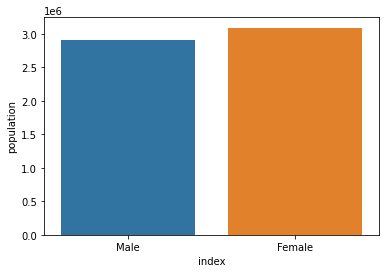

In [20]:
# population of Maryland
gender_sum = gender.sum().reset_index(name="population")
sns.barplot(x="index", y="population", data=gender_sum)

<AxesSubplot:xlabel='Gender', ylabel='count'>

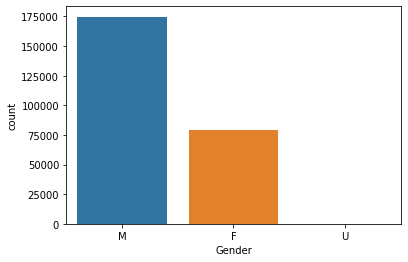

In [26]:
# Maryland traffic violations by gender
gender_traffic = traffic.value_counts(['Gender']).reset_index(name='count')
sns.barplot(x="Gender", y="count", data=gender_traffic)

<AxesSubplot:xlabel='index', ylabel='population'>

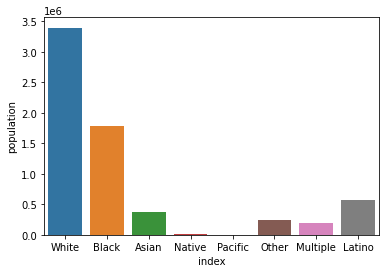

In [39]:
# I bet there's a way better way to rename these columns
# This is the best I could do with what I could find
race.rename(columns={"White Alone":"White"}, inplace=True)
race.rename(columns={"Black Alone":"Black"}, inplace=True)
race.rename(columns={"Asian Alone":"Asian"}, inplace=True)
race.rename(columns={"American Indian/Alaska Native Alone":"Native"}, inplace=True)
race.rename(columns={"Native Hawaiian/Pacific Islander Alone":"Pacific"}, inplace=True)
race.rename(columns={"Some Other Race Alone":"Other"}, inplace=True)
race.rename(columns={"Two or More Races":"Multiple"}, inplace=True)
race.rename(columns={"Hispanic or Latino (of any race)":"Hispanic"}, inplace=True)

#population of Maryand race
demograph = race.sum().reset_index(name="population")
sns.barplot(x="index", y="population", data=demograph)

<AxesSubplot:xlabel='Race', ylabel='count'>

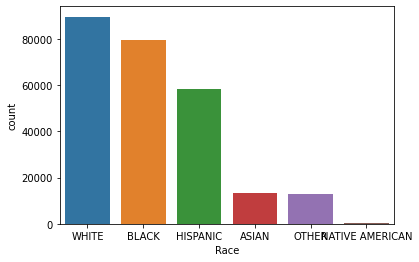

In [31]:
# traffic violations by race
race_traffic = traffic.value_counts(['Race']).reset_index(name='count')
sns.barplot(x="Race", y="count", data=race_traffic)